# Minimal tracking examples using NumPy

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # for high DPI displays in MacOS

In [2]:
import numpy as np

In [3]:
# Create single particle
from bmadx import Particle, M_ELECTRON

coords = np.ones(6)*1e-3
s = 0.0
p0c = 4e7
p = Particle(*coords, s, p0c, M_ELECTRON)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p

Particle(x=0.001, px=0.001, y=0.001, py=0.001, z=0.001, pz=0.001, s=0.0, p0c=40000000.0, mc2=510998.94999999995)

In [4]:
# Access elements by name using dot notation:
p.x

0.001

In [5]:
# Create particle beam
n_particles = 10_000 # number of particles in beam
coords = np.random.multivariate_normal(mean = np.zeros(6),
                                       cov = 1e-6*np.identity(6),
                                       size = n_particles
                                      )
beam = Particle(*coords.T, s, p0c, M_ELECTRON)
beam

Particle(x=array([ 0.00117458, -0.00073492, -0.00079163, ..., -0.00095428,
        0.00047915,  0.00088734]), px=array([ 0.00031788, -0.00251   , -0.00046062, ..., -0.00039939,
        0.00082388, -0.00125719]), y=array([-0.00043725, -0.00014114,  0.00127469, ...,  0.00049523,
        0.00161948, -0.00025206]), py=array([-0.00137352, -0.00142361,  0.00049539, ...,  0.00064033,
        0.00182777,  0.00010808]), z=array([-0.00011922, -0.00082317,  0.00063621, ..., -0.00143851,
        0.00080277, -0.00042346]), pz=array([ 0.00094013, -0.00075458, -0.000622  , ..., -0.00090539,
        0.00113797, -0.000418  ]), s=0.0, p0c=40000000.0, mc2=510998.94999999995)

Text(0, 0.5, '$y$ (mm)')

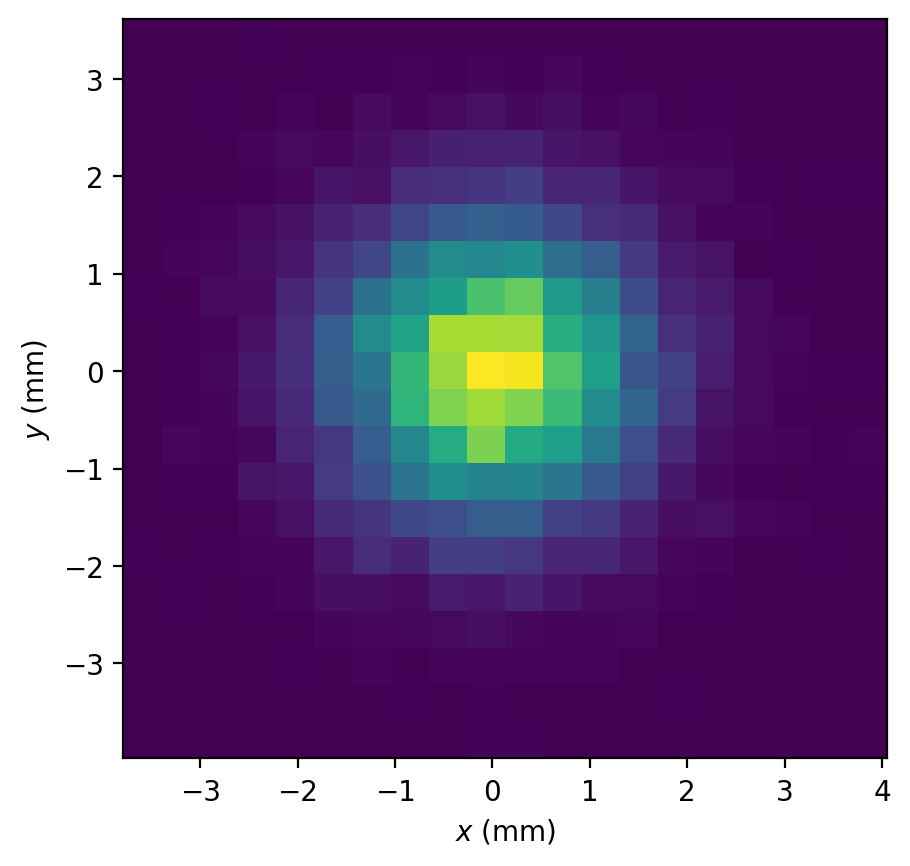

In [6]:
# plot beam x,y histogram:
fig, ax = plt.subplots()
ax.hist2d(beam.x*1e3, beam.y*1e3, bins=(20,20))
ax.set_aspect('equal')
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

In [7]:
# Create a drift element: 
from bmadx import Drift

d = Drift(L=1.0)
# Drift is a named tuple with: L (drift length): 
d

Drift(L=1.0)

In [8]:
# Track though drift
from bmadx import track_element

track_element(beam, d) # returns outgoing particle beam

Particle(x=array([ 0.00149216, -0.00324683, -0.00125254, ..., -0.00135403,
        0.00130209, -0.00037037]), px=array([ 0.00031788, -0.00251   , -0.00046062, ..., -0.00039939,
        0.00082388, -0.00125719]), y=array([-0.00180948, -0.00156583,  0.00177039, ...,  0.00113614,
        0.00344518, -0.00014394]), py=array([-0.00137352, -0.00142361,  0.00049539, ...,  0.00064033,
        0.00182777,  0.00010808]), z=array([-0.00012006, -0.00082746,  0.00063588, ..., -0.00143895,
        0.00080095, -0.00042432]), pz=array([ 0.00094013, -0.00075458, -0.000622  , ..., -0.00090539,
        0.00113797, -0.000418  ]), s=1.0, p0c=40000000.0, mc2=510998.94999999995)

In [9]:
# Create a quarupole element:
from bmadx import Quadrupole

q_focus = Quadrupole(L=0.1, K1=10.0)
# Quadrupole is a named tuple with: L, K1, X_OFFSET=0, Y_OFFSET=0, TILT=0
q_focus

Quadrupole(L=0.1, K1=10.0, NUM_STEPS=1, X_OFFSET=0.0, Y_OFFSET=0.0, TILT=0.0)

In [10]:
# Track though quadrupole
track_element(beam, q_focus)

Particle(x=array([ 0.00114762, -0.00094548, -0.00079768, ..., -0.00094623,
        0.00053635,  0.00071964]), px=array([-0.00085299, -0.00166273,  0.00034073, ...,  0.00055887,
        0.00031187, -0.00206745]), y=array([-0.0005988 , -0.00029312,  0.0013894 , ...,  0.00058539,
        0.00188667, -0.00025378]), py=array([-0.00188727, -0.00163894,  0.00181644, ...,  0.00117618,
        0.0035664 , -0.00014275]), z=array([-0.00011935, -0.00082352,  0.00063613, ..., -0.00143857,
        0.00080241, -0.00042361]), pz=array([ 0.00094013, -0.00075458, -0.000622  , ..., -0.00090539,
        0.00113797, -0.000418  ]), s=0.1, p0c=40000000.0, mc2=510998.94999999995)

In [11]:
# Track through a lattice
from bmadx import track_lattice

q_defocus =  Quadrupole(L=0.1, K1=-10.0)
lat = [d, q_focus, d, q_defocus, d, q_focus, d] # lattice is a list of elements
track_lattice(beam, lat) # returns outgoing particle beam

Particle(x=array([-0.00095454, -0.00165893,  0.00040435, ...,  0.00064024,
        0.00029196, -0.00218694]), px=array([-0.00014831,  0.00258524,  0.0003634 , ...,  0.0002693 ,
       -0.00080901,  0.00150642]), y=array([-0.00432382, -0.0042108 ,  0.00248542, ...,  0.00225245,
        0.00662561,  0.00010095]), py=array([-0.00110574, -0.00116883,  0.00027595, ...,  0.00047891,
        0.00136616,  0.00011686]), z=array([-0.00012946, -0.00084085,  0.00063016, ..., -0.00144295,
        0.00077652, -0.00042871]), pz=array([ 0.00094013, -0.00075458, -0.000622  , ..., -0.00090539,
        0.00113797, -0.000418  ]), s=4.300000000000001, p0c=40000000.0, mc2=510998.94999999995)

In [12]:
# Track through a lattice saving stats after each element
from bmadx import track_lattice_save_stats

stats = track_lattice_save_stats(beam, lat) 
# returns a dictionary with stats after each element

Text(0, 0.5, 'beam size (mm)')

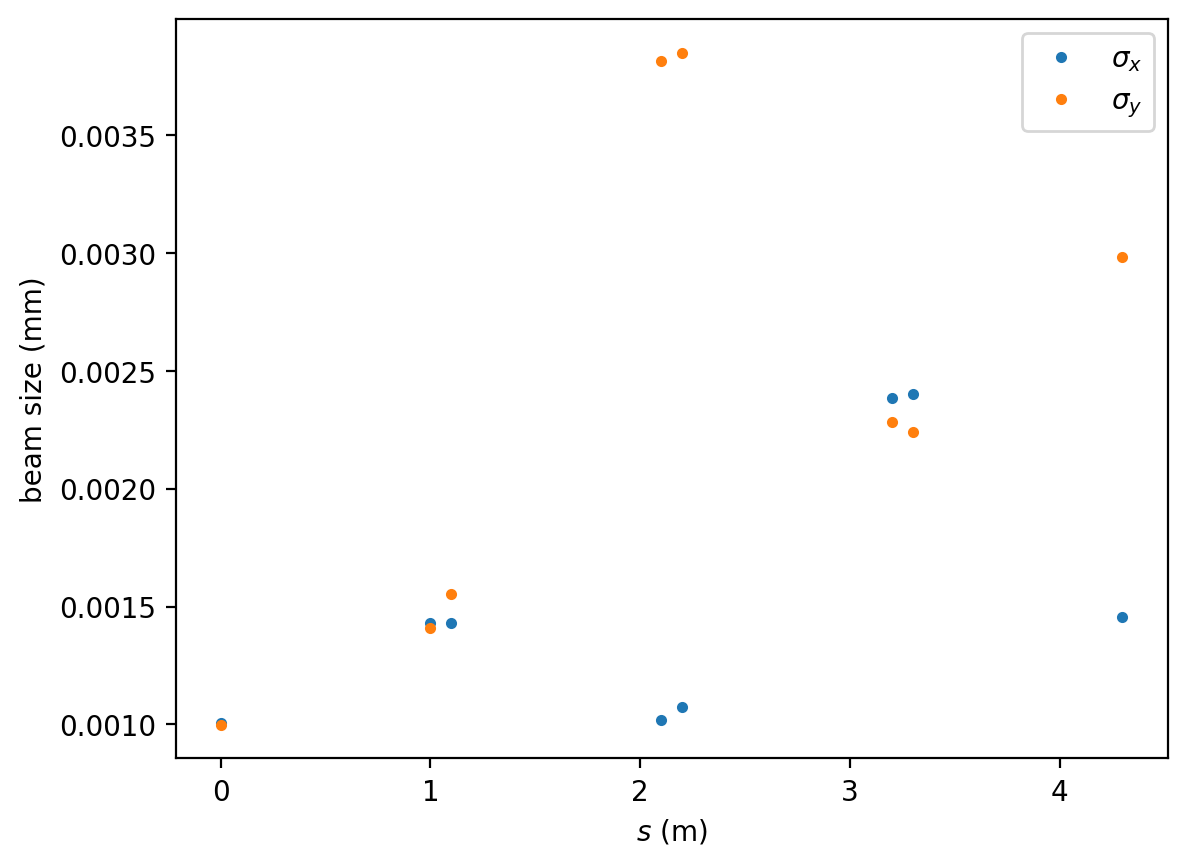

In [13]:
# Plot x and y beamsize though lattice:

plt.plot(stats['s'], stats['sigma_x'], '.', label = r'$\sigma_x$')
plt.plot(stats['s'], stats['sigma_y'], '.', label = r'$\sigma_y$')
plt.legend()
plt.xlabel(r'$s$ (m)')
plt.ylabel(r'beam size (mm)')

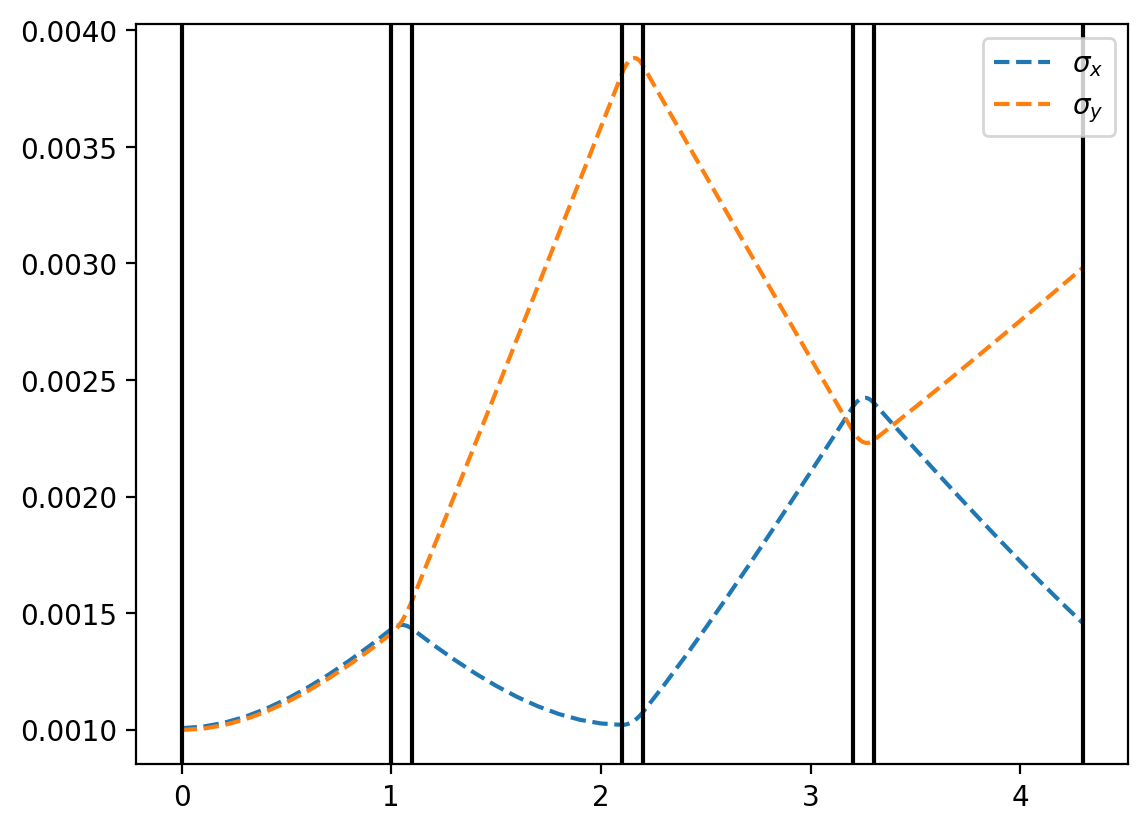

In [20]:
# one can slice every element in the lattice for plotting purposes:

n_slices = 10

stats = track_lattice_save_stats(beam, lat, n_slices=n_slices)
# plot with 10 slices per element:
plt.plot(stats['s'], stats['sigma_x'], '--', label=r'$\sigma_x$')
plt.plot(stats['s'], stats['sigma_y'], '--', label=r'$\sigma_y$')
# element entrance/exit for reference: 
[plt.axvline(x, color='black') for x in stats['s'][0::n_slices]]
plt.legend()